# NBA Player Value based on Win-Shares and Salary

In [2]:
#import required packages
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Create Dataframe from csv
#### Last updated 4/7/2019, includes games through 4/6/2019


In [3]:
#creating player stats df from csv
df_stats = pd.read_csv('nba_player_stats.csv')

In [4]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.02,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4,9.1,0.168,0.8,2.2,3,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3,2.4


## Headers throughout the table are in csv for readability, removing for analysis purposes

In [5]:
df_stats = df_stats.drop(df_stats[(df_stats.Rk == 'Rk')].index)

In [6]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.02,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4,9.1,0.168,0.8,2.2,3,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3,2.4


In [7]:
#full definition of all columns can be found at https://www.basketball-reference.com/leagues/NBA_2019_advanced.html
list(df_stats)

['Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

### View how columns were imported
We need to see what kind of object or type the columns are.

In [8]:
df_stats.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
MP        object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
OWS       object
DWS       object
WS        object
WS/48     object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

## Casting a column to Float from an Object
This is the quick and easy pandas way of doing it.

In [9]:
# ORB% is an object as noted above now check the coloumn out.
df_stats['ORB%'] = pd.to_numeric(df_stats['ORB%'], errors='coerce')

In [10]:
df_stats.dtypes

Rk         object
Player     object
Pos        object
Age        object
Tm         object
G          object
MP         object
PER        object
TS%        object
3PAr       object
FTr        object
ORB%      float64
DRB%       object
TRB%       object
AST%       object
STL%       object
BLK%       object
TOV%       object
USG%       object
OWS        object
DWS        object
WS         object
WS/48      object
OBPM       object
DBPM       object
BPM        object
VORP       object
dtype: object

### Convert all object to string object
We want to make sure we are working with the right type of strings here.

In [11]:
list_col = df_stats.columns

for col_name in list_col:
    df_stats[col_name] = df_stats[col_name].astype(str) # Cast from Object alone to String Object
    

In [12]:
df_stats.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
MP        object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
OWS       object
DWS       object
WS        object
WS/48     object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

# Now for the fun part. Convert numerical columns from objects to Numerical Objects.
For the fun part. Finding the list of columns we want as strings,
and convert those we want to numerical columns.

In [13]:

def converted_df(df_stats, list_to_remove=[]):
    
    list_col_names = df_stats.columns
    col_name_to_not_convert = ['Rk', 'Player', 'Pos', 'Tm']

    # This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
    col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

    print('Columns to convert to Float: \n',col_name_to_convert)

In [14]:
list_col_names = df_stats.columns
col_name_to_not_convert = ['Rk', 'Player', 'Pos', 'Tm']
sothing = ['BLK%', 'DBPM', 'BPM', 'STL%', 'TRB%', 'OWS', 'TS%', 'DRB%', 'FTr', 'AST%', 'WS', 'VORP', 'USG%', 'ORB%', 'PER', 'Age', 'TOV%', 'G', 'WS/48', 'DWS', '3PAr', 'OBPM', 'MP']

# This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

print('Columns to convert to Float: \n',col_name_to_convert)

Columns to convert to Float: 
 ['TOV%', 'TS%', 'DRB%', 'TRB%', 'Age', 'DWS', 'USG%', 'AST%', 'DBPM', 'OBPM', '3PAr', 'WS/48', 'FTr', 'ORB%', 'STL%', 'BLK%', 'VORP', 'OWS', 'MP', 'WS', 'G', 'BPM', 'PER']


## Now convert the ojects to Numerical objects.
This website may help you to understand the used cases of how to cast columns.
https://pbpython.com/pandas_dtypes.html

In [15]:
for col_name in col_name_to_convert:
    df_stats[col_name] = pd.to_numeric(df_stats[col_name], errors='coerce')

In [16]:
df_stats.dtypes

Rk         object
Player     object
Pos        object
Age         int64
Tm         object
G           int64
MP          int64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
dtype: object

In [17]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4.0,9.1,0.168,0.8,2.2,3.0,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3.0,2.4


In [18]:
df_contract = pd.read_csv('nba_player_contracts.csv', index_col=False)
df_contract.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,"37,457,154.00","40,231,758.00","43,006,362.00","45,780,966.00",NaN,NaN,Bird Rights,"166,476,240.00"
2,2,Chris Paul,HOU,"35,654,150.00","38,506,482.00","41,358,814.00","44,211,146.00",NaN,NaN,NaN,"159,730,592.00"
3,3,Russell Westbrook,OKC,"35,654,150.00","38,178,000.00","41,006,000.00","43,848,000.00","46,662,000.00",NaN,Bird Rights,"158,686,150.00"
4,4,LeBron James,LAL,"35,654,150.00","37,436,858.00","39,219,565.00","41,002,273.00",NaN,NaN,NaN,"113,310,573.00"


In [19]:
df_col_name = list(df_contract.iloc[0])
print(df_col_name)

['Rk', 'Player', 'Tm', ' 2018-19 ', ' 2019-20 ', ' 2020-21 ', ' 2021-22 ', ' 2022-23 ', ' 2023-24 ', 'Signed Using', ' Guaranteed ']


In [20]:
df_contract.columns = df_col_name
df_contract.head()

,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
0,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,"37,457,154.00","40,231,758.00","43,006,362.00","45,780,966.00",NaN,NaN,Bird Rights,"166,476,240.00"
2,2,Chris Paul,HOU,"35,654,150.00","38,506,482.00","41,358,814.00","44,211,146.00",NaN,NaN,NaN,"159,730,592.00"
3,3,Russell Westbrook,OKC,"35,654,150.00","38,178,000.00","41,006,000.00","43,848,000.00","46,662,000.00",NaN,Bird Rights,"158,686,150.00"
4,4,LeBron James,LAL,"35,654,150.00","37,436,858.00","39,219,565.00","41,002,273.00",NaN,NaN,NaN,"113,310,573.00"


In [21]:
df_contract.drop(df_contract.head(1).index, inplace=True)
df_contract.head()

,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,"37,457,154.00","40,231,758.00","43,006,362.00","45,780,966.00",NaN,NaN,Bird Rights,"166,476,240.00"
2,2,Chris Paul,HOU,"35,654,150.00","38,506,482.00","41,358,814.00","44,211,146.00",NaN,NaN,NaN,"159,730,592.00"
3,3,Russell Westbrook,OKC,"35,654,150.00","38,178,000.00","41,006,000.00","43,848,000.00","46,662,000.00",NaN,Bird Rights,"158,686,150.00"
4,4,LeBron James,LAL,"35,654,150.00","37,436,858.00","39,219,565.00","41,002,273.00",NaN,NaN,NaN,"113,310,573.00"
5,5,Blake Griffin,DET,"32,088,932.00","34,234,964.00","36,595,996.00","38,957,028.00",NaN,NaN,Bird Rights,"102,919,892.00"


In [22]:
df_contract['Player'] = df_contract['Player'].str.lower()

In [23]:
df_contract.head()

,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,stephen curry,GSW,"37,457,154.00","40,231,758.00","43,006,362.00","45,780,966.00",NaN,NaN,Bird Rights,"166,476,240.00"
2,2,chris paul,HOU,"35,654,150.00","38,506,482.00","41,358,814.00","44,211,146.00",NaN,NaN,NaN,"159,730,592.00"
3,3,russell westbrook,OKC,"35,654,150.00","38,178,000.00","41,006,000.00","43,848,000.00","46,662,000.00",NaN,Bird Rights,"158,686,150.00"
4,4,lebron james,LAL,"35,654,150.00","37,436,858.00","39,219,565.00","41,002,273.00",NaN,NaN,NaN,"113,310,573.00"
5,5,blake griffin,DET,"32,088,932.00","34,234,964.00","36,595,996.00","38,957,028.00",NaN,NaN,Bird Rights,"102,919,892.00"


In [24]:
df_stats['Player'] = df_stats['Player'].str.lower()
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,alex abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2
1,2,quincy acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1
2,3,jaylen adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,steven adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4.0,9.1,0.168,0.8,2.2,3.0,3.3
4,5,bam adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3.0,2.4


In [25]:
df_full_data = pd.merge(df_stats, df_contract, on='Player', how='outer')

In [26]:
# Now it is merged
df_full_data.head(10)

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TS%,3PAr,...,Rk_y,Tm_y,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,200,OKC,"5,455,236.00",NaN,NaN,NaN,NaN,NaN,NaN,"5,455,236.00"
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,509,PHO,"213,949.00",NaN,NaN,NaN,NaN,NaN,NaN,"213,949.00"
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,508,ATL,"236,854.00","1,416,852.00",NaN,NaN,NaN,NaN,NaN,"236,854.00"
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,28,OKC,"24,157,304.00","25,842,697.00","27,528,090.00",NaN,NaN,NaN,1st Round Pick,"77,528,091.00"
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,272,MIA,"2,955,840.00","3,454,080.00","5,115,492.00",NaN,NaN,NaN,1st Round Pick,"6,409,920.00"
5,6,deng adel,SF,21.0,CLE,17.0,187.0,1.7,0.376,0.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,devaughn akoon-purcell,SG,25.0,DEN,7.0,22.0,8.2,0.322,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,lamarcus aldridge,C,33.0,SAS,79.0,2621.0,22.7,0.573,0.031,...,38,SAS,"22,347,015.00","26,000,000.00","24,000,000.00",NaN,NaN,NaN,Cap Space,"55,347,015.00"
8,9,rawle alkins,SG,21.0,CHI,8.0,88.0,9.4,0.417,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,grayson allen,SG,23.0,UTA,35.0,347.0,6.1,0.514,0.589,...,338,UTA,"2,074,320.00","2,429,400.00","2,545,320.00","4,054,695.00",NaN,NaN,1st Round Pick,"4,503,720.00"


In [ ]:
##### TO DO: convert dtypes for salary info



In [27]:
df_full_data.to_csv('nba_full_dataframe.csv', index=False)

### Let's explore the data further 

In [28]:
print(len(df_full_data))

919


In [29]:
print(df_full_data.isnull().sum())


Rk_x            110
Player           30
Pos             110
Age             110
Tm_x            110
G               110
MP              110
PER             110
TS%             119
3PAr            120
FTr             120
ORB%            110
DRB%            110
TRB%            110
AST%            110
STL%            110
BLK%            110
TOV%            119
USG%            110
OWS             110
DWS             110
WS              110
WS/48           110
OBPM            110
DBPM            110
BPM             110
VORP            110
Rk_y             87
Tm_y             88
 2018-19         60
 2019-20        526
 2020-21        716
 2021-22        812
 2022-23        874
 2023-24        891
Signed Using    424
 Guaranteed      93
dtype: int64


In [30]:
# Let's remove the data that has missing values from '2018-19' for now
df_no_nan_2018_19 = df_full_data.dropna(subset = [' 2018-19 '])

In [31]:
df_no_nan_2018_19.dtypes

Rk_x             object
Player           object
Pos              object
Age             float64
Tm_x             object
G               float64
MP              float64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
DWS             float64
WS              float64
WS/48           float64
OBPM            float64
DBPM            float64
BPM             float64
VORP            float64
Rk_y             object
Tm_y             object
 2018-19         object
 2019-20         object
 2020-21         object
 2021-22         object
 2022-23         object
 2023-24         object
Signed Using     object
 Guaranteed      object
dtype: object

In [33]:
import re

In [65]:

y = df_no_nan_2018_19[' 2018-19 ']



In [66]:
y = y.str.lstrip(' ')

In [67]:
y = y.str.rstrip(' ')

In [68]:
y = y.replace(',', '')

In [69]:
print(y)

0       5,455,236.00
1         213,949.00
2         236,854.00
3      24,157,304.00
4       2,955,840.00
7      22,347,015.00
9       2,074,320.00
10      2,034,120.00
12      6,957,105.00
13      2,516,048.00
14      8,641,000.00
15     20,421,546.00
16     20,421,546.00
17     20,421,546.00
18      1,378,242.00
19     24,157,304.00
21     25,534,253.00
22      2,393,887.00
23      1,952,760.00
24      1,349,383.00
25     15,000,000.00
26     15,000,000.00
27     15,000,000.00
28      7,250,000.00
29      8,165,160.00
30      1,378,242.00
31      7,305,600.00
32      4,544,400.00
33        170,915.00
34      4,544,400.00
           ...      
889     1,865,547.00
890     1,544,951.00
891     1,544,951.00
892     1,378,242.00
893     1,360,304.00
894     1,349,383.00
895     1,000,000.00
896       999,200.00
897       950,000.00
898       945,126.00
899       833,333.00
900       685,341.00
901       650,000.00
902       517,219.00
903       459,414.00
904       350,088.00
905       333

In [55]:
y = y.astype(float)

ValueError: could not convert string to float: '5,455,236.00'

In [31]:
print(len(df_no_nan_2018_19))

859


In [32]:
# Scatter plot showing win-shares vs. salary 2018-19 season
df_no_nan_2018_19.head(10)

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TS%,3PAr,...,Rk_y,Tm_y,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,200,OKC,"5,455,236.00",NaN,NaN,NaN,NaN,NaN,NaN,"5,455,236.00"
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,509,PHO,"213,949.00",NaN,NaN,NaN,NaN,NaN,NaN,"213,949.00"
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,508,ATL,"236,854.00","1,416,852.00",NaN,NaN,NaN,NaN,NaN,"236,854.00"
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,28,OKC,"24,157,304.00","25,842,697.00","27,528,090.00",NaN,NaN,NaN,1st Round Pick,"77,528,091.00"
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,272,MIA,"2,955,840.00","3,454,080.00","5,115,492.00",NaN,NaN,NaN,1st Round Pick,"6,409,920.00"
7,8,lamarcus aldridge,C,33.0,SAS,79.0,2621.0,22.7,0.573,0.031,...,38,SAS,"22,347,015.00","26,000,000.00","24,000,000.00",NaN,NaN,NaN,Cap Space,"55,347,015.00"
9,10,grayson allen,SG,23.0,UTA,35.0,347.0,6.1,0.514,0.589,...,338,UTA,"2,074,320.00","2,429,400.00","2,545,320.00","4,054,695.00",NaN,NaN,1st Round Pick,"4,503,720.00"
10,11,jarrett allen,C,20.0,BRK,78.0,2046.0,18.8,0.637,0.079,...,339,BRK,"2,034,120.00","2,376,840.00","3,909,902.00",NaN,NaN,NaN,1st Round Pick,"4,410,960.00"
12,13,al-farouq aminu,PF,28.0,POR,79.0,2246.0,13.0,0.568,0.474,...,179,POR,"6,957,105.00",NaN,NaN,NaN,NaN,NaN,Cap Space,"6,957,105.00"
13,14,justin anderson,SF,25.0,ATL,46.0,432.0,11.0,0.501,0.483,...,291,ATL,"2,516,048.00",NaN,NaN,NaN,NaN,NaN,1st Round pick,"2,516,048.00"


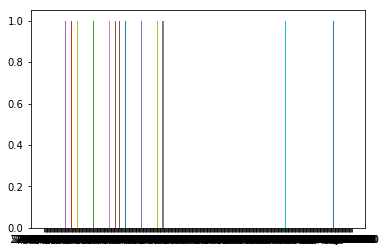

In [34]:
salary1 = df_no_nan_2018_19[' 2018-19 ']

n_bins = 20

n_bins = int(n_bins)

_ = plt.hist(salary1, bins = n_bins)

plt.show()

In [34]:
#ws = df_no_nan_2018_19.WS
#n_bins = np.sqrt(len(ws))
#n_bins = int(n_bins)

#_ = plt.hist(ws, density = True, bins = n_bins)
#plt.show()